In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

# files for hand in

# test files

In [234]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_00_52_53__31Out2017_.csv'

In [370]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/build/results.csv'

In [486]:
fn = !zenity --file-selection
fn = fn[0]
fn

'/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_10_51_07__31Out2017_handin_laser.csv'

In [487]:
with open(fn, 'r') as f:
    reader = csv.reader(f)
    csv_data = [row for row in reader]

In [488]:
print('using lidar:', csv_data[0][2] == '1')
print('using radar:', csv_data[0][3] == '1')
print('noise a:', csv_data[0][0])
print('noise yawdd:', csv_data[0][1])

using lidar: True
using radar: False
noise a: 3.000000
noise yawdd: 0.196300


In [489]:
data = np.loadtxt(fn, delimiter=',', skiprows=1)

In [490]:
rmse = data[:,:4]
gt = data[:,4:4+4]
est = data[:,8:8+5]
P = data[:,13:-1]
nis = data[:,-2]
sensor = data[:,-1]

In [491]:
rmse_thesholds = [.09, .10, .40, .30]
titles = ['px', 'py', 'vx', 'vy']

In [492]:
rmse[-1]

array([ 0.156981,  0.110453,  0.566587,  0.262187])

last rmse for px is 0.156981
last rmse for py is 0.110453
last rmse for vx is 0.566587
last rmse for vy is 0.262187


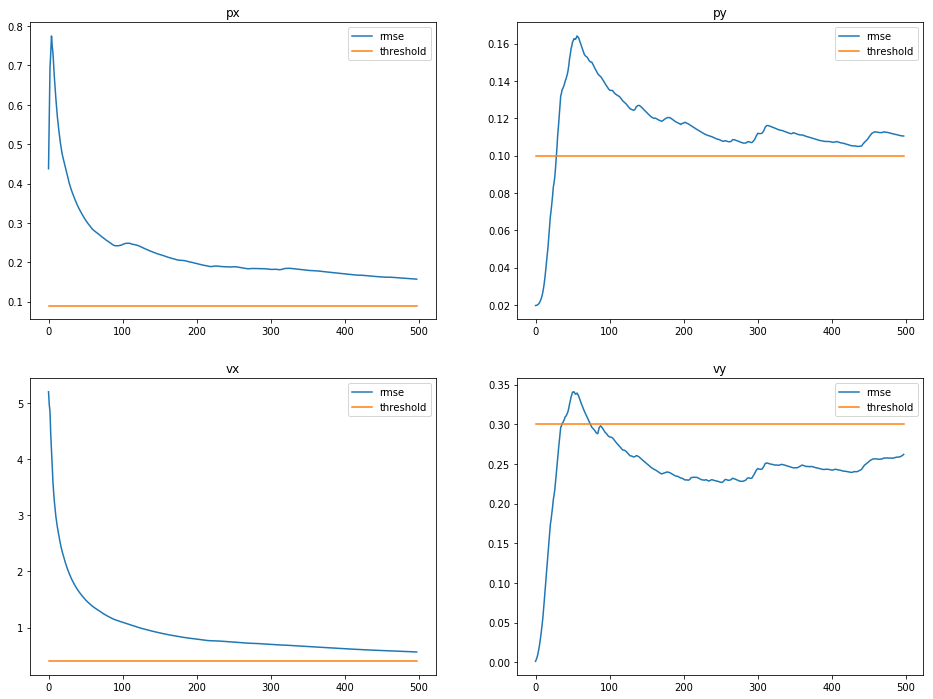

In [493]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

for ax, col_data, thresh, title in zip(axes, rmse.T, rmse_thesholds, titles):
    ax.plot(col_data, label='rmse')
    ax.plot([0, len(col_data)], [thresh, thresh], label='threshold')
    ax.set_title(title)
    ax.legend()
    print('last rmse for {} is {}'.format(title, col_data[-1]))

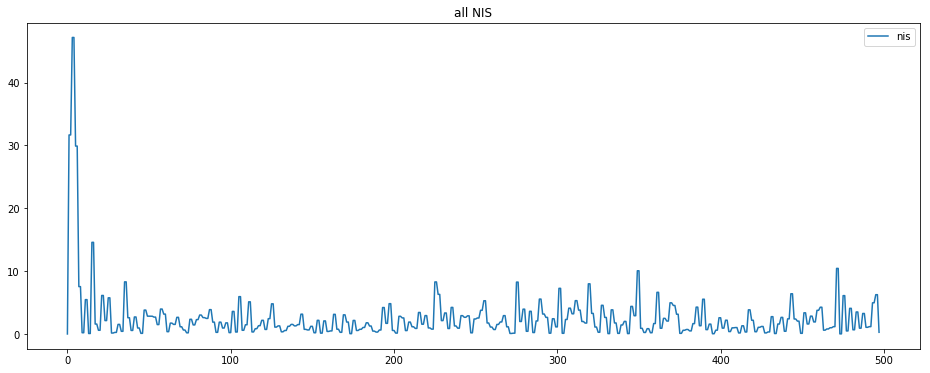

In [494]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(16)
fig.set_figheight(6)


ax1.plot(nis, label='nis')
ax1.set_title('all NIS')
ax1.legend()

lidar samples above threshold:  0.0724346076459
total samples above threshold:  0.0724346076459


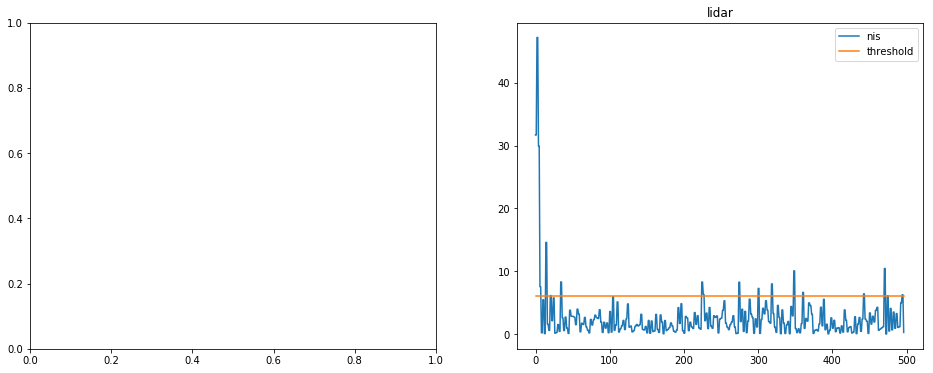

In [512]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(6)
samples_above = 0
total_samples = 0


if len(nis[sensor==1]) > 0:
    thresh = 7.815
#     ary2plot = nis[sensor==1]
    ary2plot = nis[sensor==1][2:]
    ax1.plot(ary2plot, label='nis')
    ax1.plot([0, len(ary2plot)], [thresh, thresh], label='threshold')
    ax1.set_title('radar')
    ax1.legend()
    print('radar samples above threshold: ', sum(ary2plot >= thresh) / len(ary2plot))
    samples_above += sum(ary2plot >= thresh)
    total_samples += len(ary2plot)

if len(nis[sensor==0]) > 0:
    thresh = 5.991
    ary2plot = nis[sensor==0]
#     ary2plot = nis[sensor==0][16:]
    ax2.plot(ary2plot, label='nis')
    ax2.plot([0, len(ary2plot)], [thresh, thresh], label='threshold')
    ax2.set_title('lidar')
    ax2.legend()
    print('lidar samples above threshold: ', sum(ary2plot >= thresh) / len(ary2plot))
    samples_above += sum(ary2plot >= thresh)
    total_samples += len(ary2plot)
    
print('total samples above threshold: ', samples_above / total_samples)

In [496]:
# maximum distance from origin
dist = [np.sqrt(px**2 + py**2) for px, py in zip(gt[:,0], gt[:,1])]
max(dist)

26.665607813516345

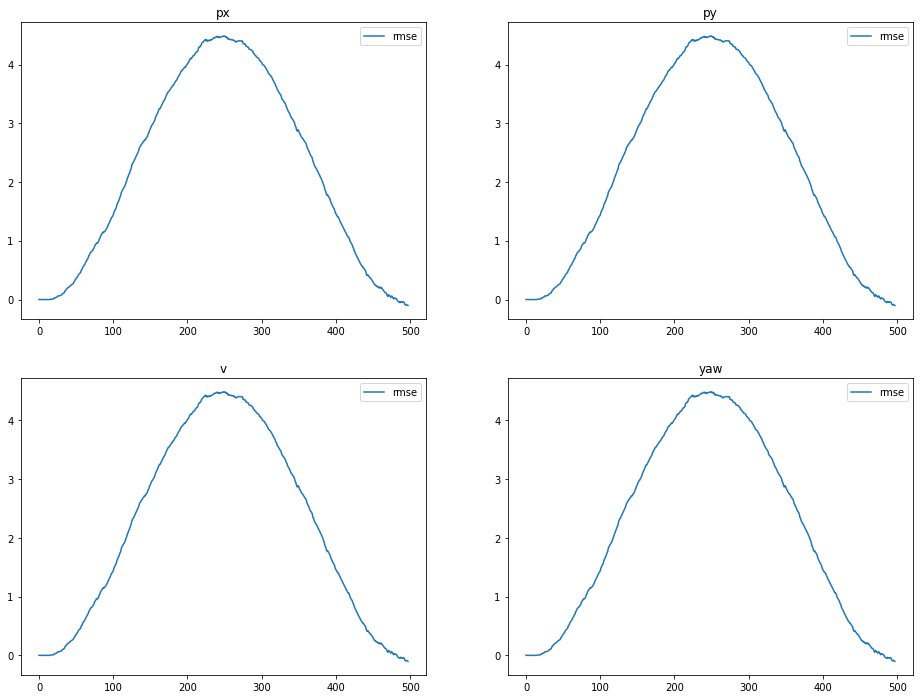

In [497]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

titles = ['px', 'py', 'v', 'yaw']
for ax, title in zip(axes,titles):
    ax.plot(est[:,i], label='rmse')
    ax.set_title(title)
    ax.legend()

In [498]:
noise_a = 2

In [499]:
t = 1


In [500]:
import math

In [501]:
math.pi / 16

0.19634954084936207